In [18]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

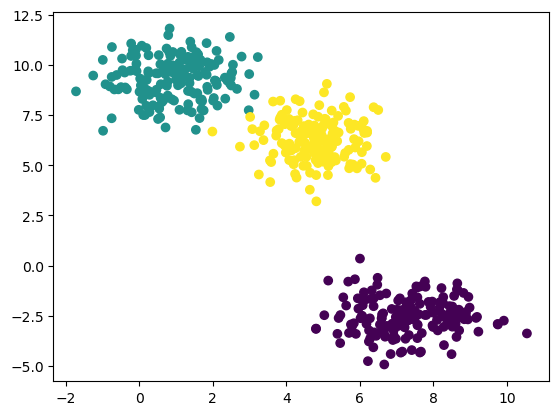

In [19]:
n_samples = 500
seed = 32

blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)

# plot the generated data
X, y = blobs
plt.scatter(X[:, 0], X[:,1], c=y, cmap='viridis')

In [24]:
# Save the data as csv
data = np.column_stack((X[:, 0], X[:,1]))
np.savetxt('data.csv', data, delimiter=',')

In [ ]:
gmm = mixture.GaussianMixture(n_components=3, covariance_type='full')

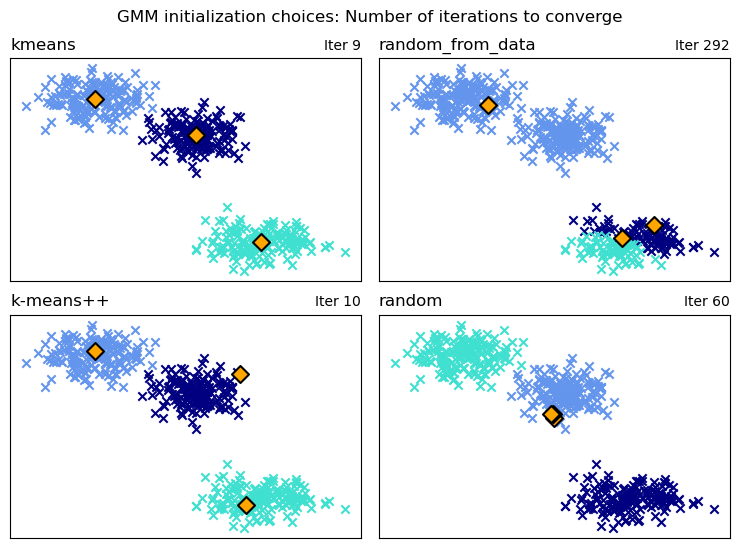

In [31]:
def get_initial_means(X, init_params, r):
    # Run a GaussianMixture with max_iter=0 to output the initialization means
    gmm = mixture.GaussianMixture(
        n_components=3, init_params=init_params, tol=1e-9, max_iter=0, random_state=r
    ).fit(X)
    return gmm.means_


methods = ["kmeans", "random_from_data", "k-means++", "random"]
colors = ["navy", "turquoise", "cornflowerblue", "darkorange"]


plt.figure(figsize=(4 * len(methods) // 2, 6))
plt.subplots_adjust(
    bottom=0.1, top=0.9, hspace=0.15, wspace=0.05, left=0.05, right=0.95
)

for n, method in enumerate(methods):
    r = np.random.RandomState(seed=1234)
    plt.subplot(2, len(methods) // 2, n + 1)

    ini = get_initial_means(X, method, r)


    gmm = mixture.GaussianMixture(
        n_components=3, means_init=ini, tol=1e-9, max_iter=2000, random_state=r
    ).fit(X)

    for i, color in enumerate(colors):
        data = X[gmm.predict(X) == i]
        plt.scatter(data[:, 0], data[:, 1], color=color, marker="x")

    plt.scatter(
        ini[:, 0], ini[:, 1], s=75, marker="D", c="orange", lw=1.5, edgecolors="black"
    )

    plt.xticks(())
    plt.yticks(())
    plt.title(method, loc="left", fontsize=12)
    plt.title(
        "Iter %i" % (gmm.n_iter_),
        loc="right",
        fontsize=10,
    )
plt.suptitle("GMM initialization choices: Number of iterations to converge")
plt.show()